In [0]:
import pandas as pd 
import fastai

In [0]:
df1 = pd.read_csv('bppt_panl_train.csv',header=None)
df2 = pd.read_csv('bppt_panl_test.csv',header=None)


In [0]:
df1,df2

(       0                                                  1
 0      1  Saya berada di sini dua tahun lalu, tapi saat ...
 1      0  Pertumbuhan ekonomi 2007 yang diproyeksikan me...
 2      3  Pelatih Real Bernd Schuster harus mengeluarkan...
 3      2  Laporan itu adalah pengumuman kedua dari badan...
 4      0  Lonjakan laba bersih tersebut, selain didorong...
 ...   ..                                                ...
 21615  1  Brasil mulai memperkaya uranium pada 2004 dan ...
 21616  2  Sepuluh persen dari berat tubuh prajurit utama...
 21617  0  Rapat Dewan Gubernur BI, Kamis, memutuskan unt...
 21618  1  Sebanyak 29 orang sebagian besar terdiri warga...
 21619  0  Secara umum semua terkendali, dengan pemerinta...
 
 [21620 rows x 2 columns],
       0                                                  1
 0     1  Kedua orang yang cedera itu berada dalam kondi...
 1     0  Paradoksnya di sisi lain, sinyal akan diakuiny...
 2     0  Menurut dia, harga minyak mentah dunia saat in...

In [0]:
df1.columns=['Category','text']
df2.columns=['Category','text']

In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [0]:


data_lm = TextLMDataBunch.from_df(path='', train_df=df1, valid_df=df2,bs=40)
data_lm.vocab.save('in_itos.pkl')




In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3,pretrained=True)


In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 9.12E-02


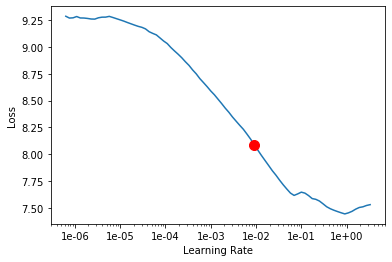

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [105]:
min_lr=1.1e-02
learn.fit_one_cycle(5,slice(min_lr/(2.6**4),min_lr),moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,5.194084,4.642234,0.276671,00:51
1,4.210851,4.017035,0.317729,00:52
2,3.664197,3.825207,0.333271,00:52
3,3.135251,3.805388,0.339971,00:52
4,2.737275,3.861470,0.338286,00:52


In [0]:
learn.save_encoder('ft_enc_in')
learn.save('ind_lm')


In [107]:
import numpy as np 
np.exp(3.970794)

53.02661726326197

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM,pretrained=True, drop_mult=0.3)
learn.load_encoder('ft_enc_in')
learn.freeze()


In [109]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.45E-03
Min loss divided by 10: 4.37E-02


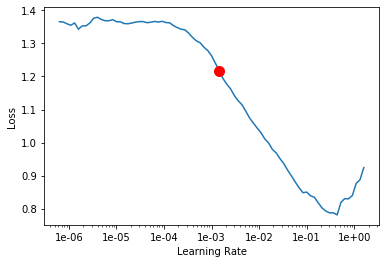

In [110]:
learn.recorder.plot(suggestion=True)

In [111]:
learn.fit_one_cycle(5, 1.45E-03,moms=[0.8,0.7])


epoch,train_loss,valid_loss,accuracy,time
0,0.354910,0.237480,0.918019,00:48
1,0.297213,0.219298,0.923845,00:49
2,0.272398,0.208998,0.925510,00:45
3,0.260310,0.200411,0.929671,00:47
4,0.232493,0.198123,0.925926,00:49


In [0]:
learn.unfreeze()

In [115]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.45E-04


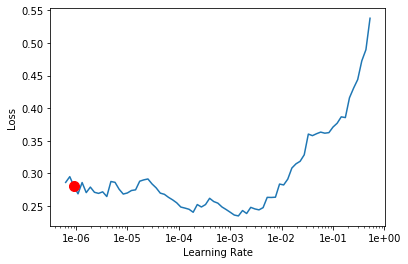

In [116]:
learn.recorder.plot(suggestion=True)

In [0]:
min_lr=5E-3

In [118]:
learn.fit_one_cycle(3,  slice(min_lr/(2.6**4),min_lr), moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,0.278694,0.188416,0.935081,00:56
1,0.177247,0.141639,0.950895,00:53
2,0.098025,0.146908,0.949230,00:50


In [0]:
learn.export('ind_clas.pkl')

In [120]:
learn.predict('bang gua mau bl jeruk  peres atu yak')

(Category 2,
 tensor(2),
 tensor([4.1529e-05, 6.2159e-09, 9.9996e-01, 1.1437e-09]))